## 1. Ambiente y Craga de Datos


In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')

#Carga el archivo retail_sales.csv en un DataFrame de Pandas.
path = "/content/drive/MyDrive/SONDA | Data Science/Data Science Fundamentals/BBDD/retail_sales_dataset.csv"
df = pd.read_csv(path)

Mounted at /content/drive


## 2. Transformación de Datos
Crea nuevas columnas: Basándonos en los datos existentes, crea nuevas columnas que sean útiles para el análisis. Por ejemplo, calcula el ingreso total por venta y normaliza las ventas.

In [2]:
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
#, calcula el ingreso total por venta y normaliza las ventas.

min_val = df["Total Amount"].min()
max_val = df["Total Amount"].max()

df["Ventas Normalizadas"] = (df["Total Amount"] - min_val) / (max_val - min_val)


Clasifica los datos: Crea una columna que clasifique las ventas en categorías significativas (e.g., ‘Alta’, ‘Media’, ‘Baja’).

In [4]:
#se crea funcion que recibe como param de entrada un decimal (que correspondera a la venta normalizada)
def categ_ventas(x: float):
  if x > 0.5 : return "Alta"
  elif  x  < 0.5: return "Baja"
  elif x == 0.5: return "Media"

df["Categoria Venta"] = df["Ventas Normalizadas"].apply(lambda x: categ_ventas(x))
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Ventas Normalizadas,Categoria Venta
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,0.012658,Baja
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,0.032911,Baja
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,0.037975,Baja
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,0.063291,Baja
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120,0.048101,Baja


## Agrupación y Agregación
Agrupación por múltiples columnas: Realiza agrupaciones por categorías como producto y tienda, producto y mes, etc.


In [5]:
#no existen las columnas tienda ni producto en el data set, utilizare otras para desarrollar este item
df.groupby("Gender")["Total Amount"].sum()
df.groupby("Product Category")["Total Amount"].sum()
df.groupby(["Gender", "Product Category"])["Total Amount"].sum()

#transformo a datetime la columna Date para obtener mes (esta limpieza y transformacion se realizcó en parte II)
df["Date"] = pd.to_datetime(df["Date"])
df.groupby([df["Date"].dt.year, df["Date"].dt.month_name()])["Total Amount"].sum()

Date  Date     
2023  April        33870
      August       36960
      December     44690
      February     44060
      January      35450
      July         35465
      June         36715
      March        28990
      May          53150
      November     34920
      October      46580
      September    23620
2024  January       1530
Name: Total Amount, dtype: int64

Aplicar funciones de agregación: Utiliza funciones como sum, mean, count, min, max, std, y var para obtener estadísticas descriptivas de cada grupo.

In [6]:
df["Total Amount"].mean() #media
df["Total Amount"].std() #desviacion estandar
df["Total Amount"].min()# venta minima
df["Total Amount"].max() # venta mas alta
df["Total Amount"].describe() #ver estadisticas descriptivas

,Total Amount
count,1000.000000
mean,456.000000
std,559.997632
min,25.000000
25%,60.000000
50%,135.000000
75%,900.000000
max,2000.000000


## Análisis Personalizado con apply
Función personalizada: Aplica funciones personalizadas para realizar análisis específicos que no se pueden lograr con las funciones de agregación estándar.
Ejemplo de uso avanzado: Calcula la desviación de cada venta respecto a la media de su grupo.


In [7]:
#creamos la funcion que recibe como parametro de entrada una fila
def mean_group(row):
    categoria = row["Product Category"]
    venta = row["Total Amount"]
    media = df[df["Product Category"] == categoria]["Total Amount"].mean() #calculando media de la categoria
    return venta - media #esviación de cada venta respecto a la media de su grupo.

df.apply(mean_group, axis=1) #axis 1 porque recibe mas de una columna




,0
0,-317.475570
1,556.752137
2,-428.786550
3,56.752137
4,-367.475570
...,...
995,-393.247863
996,-377.475570
997,-367.475570
998,-308.786550


In [8]:
def cat_edad(edad):
    if edad < 18:
        return "Menor"
    elif edad < 40:
        return "Joven"
    elif edad < 65:
        return "Adulto"
    else:
        return "Mayor"

df["Categoria_Edad"] = df["Age"].apply(lambda x: cat_edad(x))
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Ventas Normalizadas,Categoria Venta,Categoria_Edad
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,0.063291,Baja,Joven
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,0.493671,Baja,Joven
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,0.002532,Baja,Adulto
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,0.240506,Baja,Joven
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,0.037975,Baja,Joven


# Visualización para ciencia de datos / Proyecto I- Parte IV (Core)
## Análisis Descriptivo y Visualización
### Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.

In [9]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Transaction ID,1000.0,500.5,1.0,250.75,500.5,750.25,1000.0,288.819436
Date,1000,2023-07-03 00:25:55.200000256,2023-01-01 00:00:00,2023-04-08 00:00:00,2023-06-29 12:00:00,2023-10-04 00:00:00,2024-01-01 00:00:00,NaN
Age,1000.0,41.392,18.0,29.0,42.0,53.0,64.0,13.68143
Quantity,1000.0,2.514,1.0,1.0,3.0,4.0,4.0,1.132734
Price per Unit,1000.0,179.89,25.0,30.0,50.0,300.0,500.0,189.681356
Total Amount,1000.0,456.0,25.0,60.0,135.0,900.0,2000.0,559.997632
Ventas Normalizadas,1000.0,0.218228,0.0,0.017722,0.055696,0.443038,1.0,0.283543


### Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.

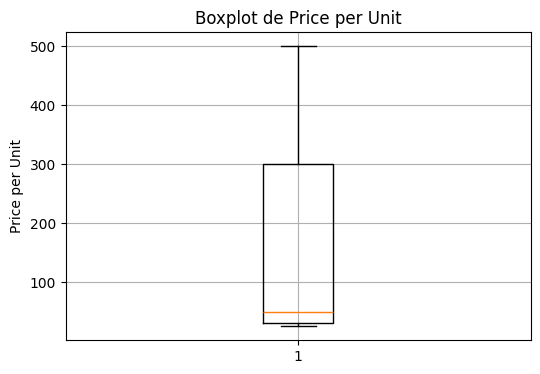

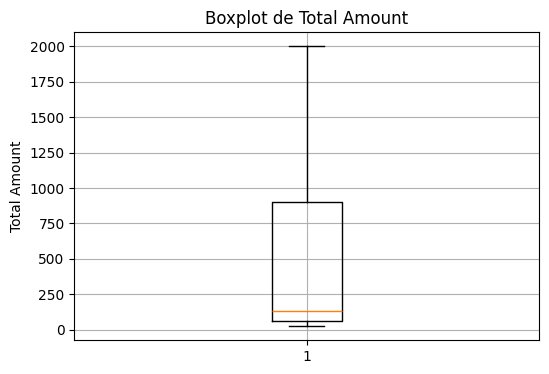

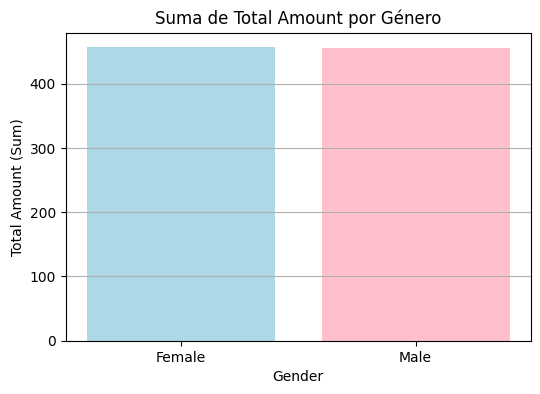

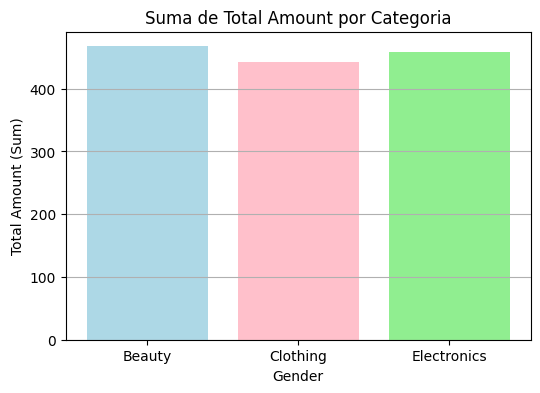

In [10]:
plt.figure(figsize=(6, 4))
plt.boxplot(df["Price per Unit"])
plt.title("Boxplot de Price per Unit")
plt.ylabel("Price per Unit")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.boxplot(df["Total Amount"])
plt.title("Boxplot de Total Amount")
plt.ylabel("Total Amount")
plt.grid(True)
plt.show()

gender_totals = df.groupby("Gender")["Total Amount"].mean()

plt.figure(figsize=(6, 4))
plt.bar(gender_totals.index, gender_totals.values, color=["lightblue", "pink"])
plt.xlabel("Gender")
plt.ylabel("Total Amount (Sum)")
plt.title("Suma de Total Amount por Género")
plt.grid(axis='y')
plt.show()

category_totals = df.groupby("Product Category")["Total Amount"].mean()

plt.figure(figsize=(6, 4))
plt.bar(category_totals.index, category_totals.values, color=["lightblue", "pink", "lightgreen"])
plt.xlabel("Gender")
plt.ylabel("Total Amount (Sum)")
plt.title("Suma de Total Amount por Categoria")
plt.grid(axis='y')
plt.show()

### Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.

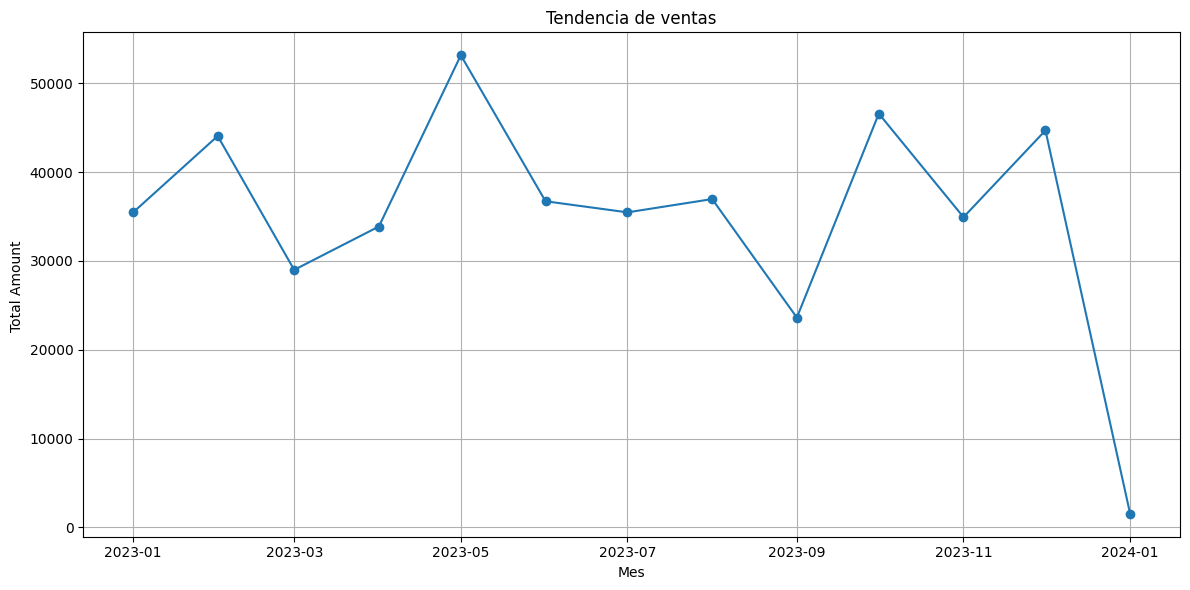

In [11]:
df["Date"] = pd.to_datetime(df["Date"])

ventas_mensuales = df.groupby(df["Date"].dt.to_period("M"))["Total Amount"].sum()

# Convertir el índice de Periodo a fecha para graficar correctamente
ventas_mensuales.index = ventas_mensuales.index.to_timestamp()


plt.figure(figsize=(12, 6))
plt.plot(ventas_mensuales.index, ventas_mensuales.values, marker='o', linestyle='-')
plt.title("Tendencia de ventas")
plt.xlabel("Mes")
plt.ylabel("Total Amount ")
plt.grid(True)
plt.tight_layout()
plt.show()

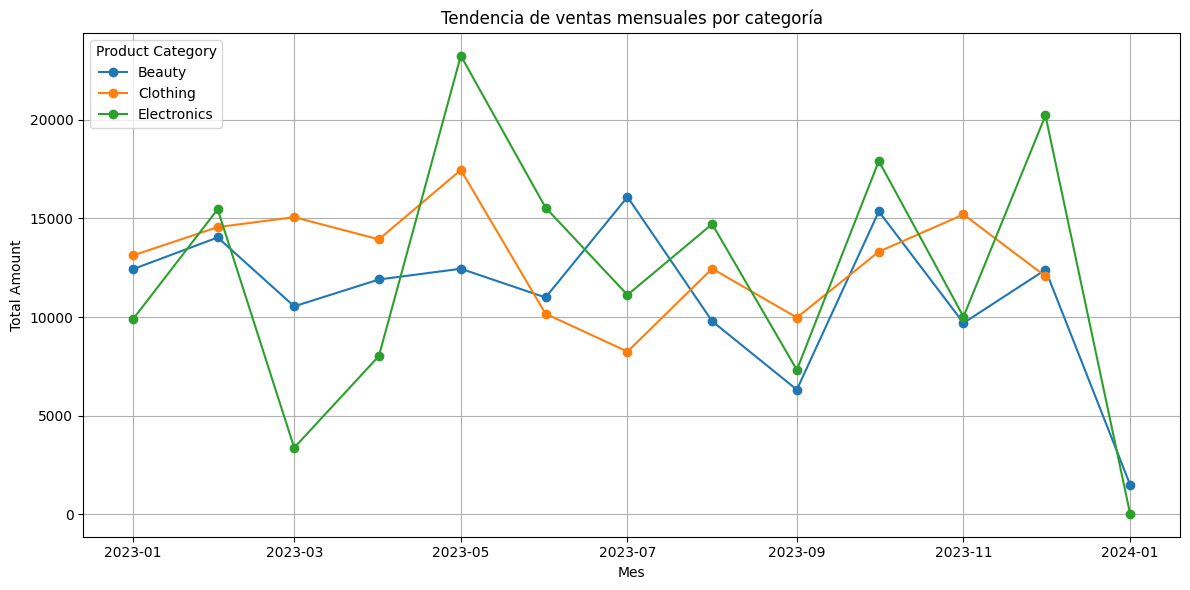

In [12]:

df["Date"] = pd.to_datetime(df["Date"])
df["Mes"] = df["Date"].dt.to_period("M")
ventas_mensuales_cat = df.groupby(["Mes", "Product Category"])["Total Amount"].sum().unstack()

ventas_mensuales_cat.index = ventas_mensuales_cat.index.to_timestamp()


plt.figure(figsize=(12, 6))
for categoria in ventas_mensuales_cat.columns:
    plt.plot(ventas_mensuales_cat.index, ventas_mensuales_cat[categoria], marker='o', label=categoria)

plt.title("Tendencia de ventas mensuales por categoría")
plt.xlabel("Mes")
plt.ylabel("Total Amount")
plt.legend(title="Product Category")
plt.grid(True)
plt.tight_layout()
plt.show()

Clothing y Beauty tienen ventas más estables.  
Todos disminuyen drásticamente en enero de 2024  

### Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.

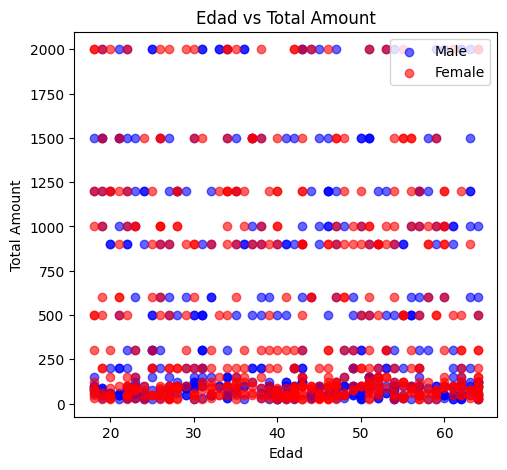

In [13]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
genders = df["Gender"].unique()
colors = {"Male": "blue", "Female": "red"}

for gender in genders:
    subset = df[df["Gender"] == gender]
    plt.scatter(subset["Age"], subset["Total Amount"], label=gender, alpha=0.6, c=colors[gender])

plt.title("Edad vs Total Amount")
plt.xlabel("Edad")
plt.ylabel("Total Amount")
plt.legend()

No se aprecia una relacion clara entre la edad del cliente y el monto gastado.  
Tanto hombres como mujeres gastan montos altos o bajos.  
La edad no es un factor determinante en el monto de la compra.   

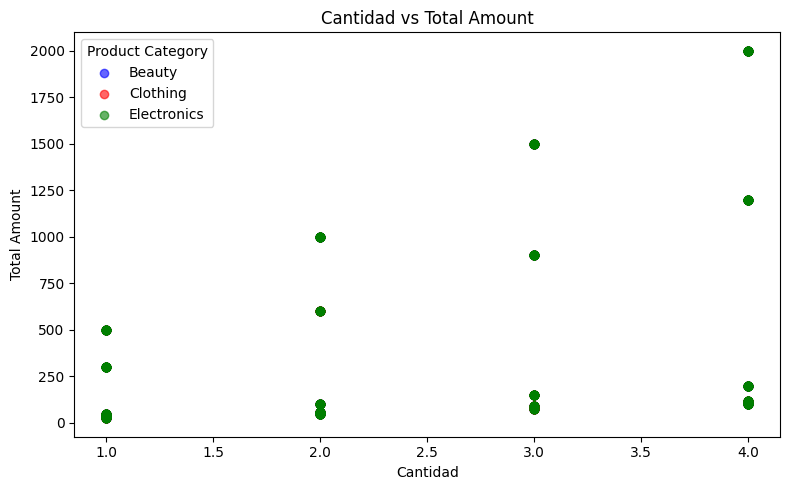

In [14]:
categories = df["Product Category"].unique()

colores_categorias = [
    "blue", "red", "green", "orange", "purple",
    "brown", "pink", "gray", "olive", "cyan"
]

plt.figure(figsize=(8, 5))
#asignar un color a la categoria
for i, category in enumerate(categories):
    subset = df[df["Product Category"] == category]
    color = colores_categorias[i % len(colores_categorias)]
    plt.scatter(subset["Quantity"], subset["Total Amount"], label=category, alpha=0.6, color=color)

plt.title("Cantidad vs Total Amount")
plt.xlabel("Cantidad")
plt.ylabel("Total Amount")
plt.legend(title="Product Category")
plt.tight_layout()
plt.show()

### Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.

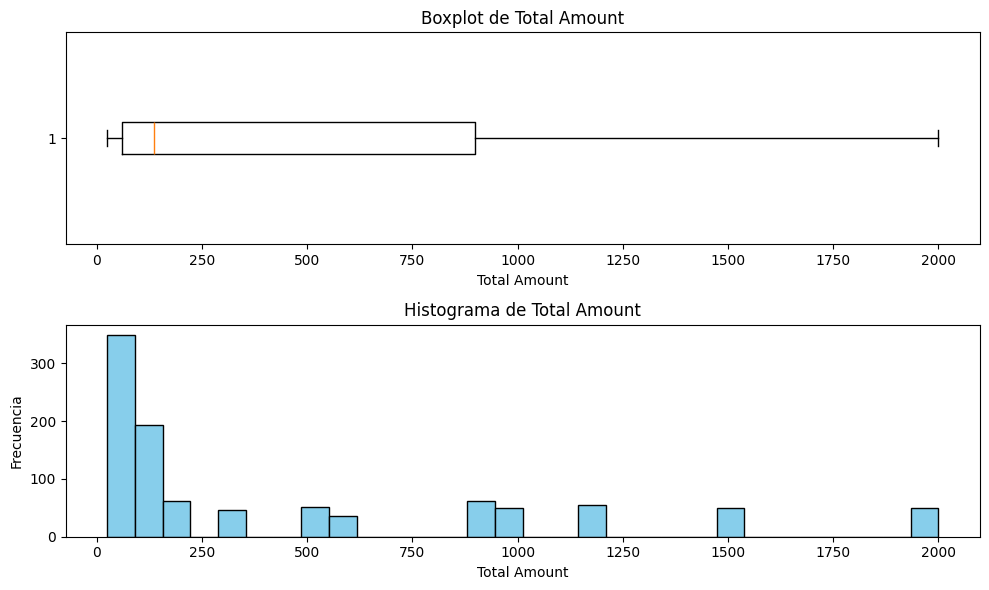

In [15]:


plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 1)
plt.boxplot(df["Total Amount"], vert=False)
plt.title("Boxplot de Total Amount")
plt.xlabel("Total Amount")

plt.subplot(2, 1, 2)
plt.hist(df["Total Amount"], bins=30, color="skyblue", edgecolor="black")
plt.title("Histograma de Total Amount")
plt.xlabel("Total Amount")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

La mayoría de las ventas se concentran por debajo de los 500.  
Existen muchos valores atípicos  por sobre ese rango, incluso llegando a los 2000.  
El negocio de retail genera muchas ventas pequeñas, y pocas ventas de alto valor.  

# Proyecto 1 – Parte V (Core)


## 2. Exploración de Datos Avanzada

### Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df["Gender"].value_counts()
df["Gender_1_2"] = df["Gender"].apply(lambda x: 1 if x == "Male" else 2)
df["Gender_1_2"].value_counts()

,count
Gender_1_2,
2,510
1,490


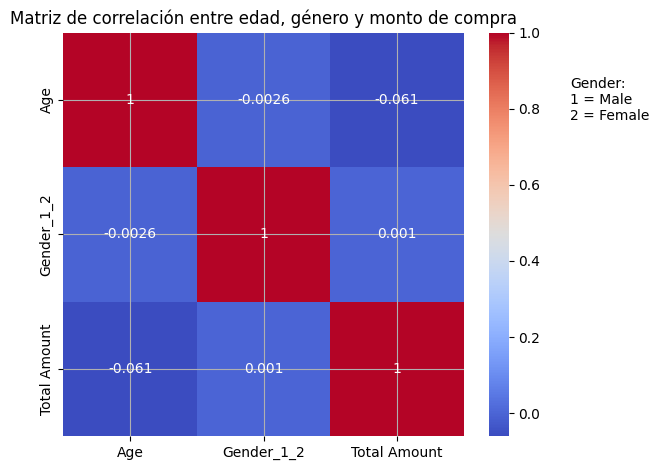

In [40]:

corr = df[["Age","Gender_1_2","Total Amount"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación entre edad, género y monto de compra")
plt.text(3.8, 0.5, "Gender:\n1 = Male\n2 = Female",
         fontsize=10, verticalalignment='center')

plt.grid(True)
plt.tight_layout()
plt.show()

La correlación entre edad y genero es de -0.0026, es decir prácticamente nula.No hay relación entre edad y género según este dataset.

Entre edad y monto toal hay una correlación de -0.061 indicando una pequeña tendencia de que a mayor edad, mayor es el gasto total de la compra. Pero es una correlación muy baja.

Las correlaciones son demasiado pequeñas por lo que podríamos decir que las variables genero, edad y monto total son independientes y no están relacionadas entre sí-